# Preparación del dataset

El dataset CIFAR10 es un dataset para experimentar con reconocimiento de imágenes. Consiste en un dataset de 60.000 imágenes pequeñas (32 x 32 pixeles) con 10 clases de objetos (6000 por clase), es decir, cada clase tiene la misma probabilidad.

El dataset contiene 50000 ejemplos de entrenamiento y 10000 de prueba. Del conjunto de entrenamiento, se han extraído al azar 10000 ejemplos desde el conjunto de entrenamiento para el conjunto de validación. Por lo que al final se cuenta con 40000 ejemplos de entrenamiento, 10000 de validación y 10000 de prueba.

In [1]:
from scipy.misc import imread
import cPickle as pickle
import numpy as np
import os
 
def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
    return X, np.array(Y)
 
def load_CIFAR10(PATH):
    xs, ys = [], []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % b)
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
 
    numero_imagenes = 10000
    np.random.seed(2)
    seleccion = np.random.choice(50000, numero_imagenes, replace = False)
 
    Xva = np.array(list(Xtr[i] for i in seleccion))
    Yva = np.array(list(Ytr[i] for i in seleccion))
 
    Xtr = np.delete(Xtr, seleccion, 0)
    Ytr = np.delete(Ytr, seleccion)
   
    return Xtr, Ytr, Xte, Yte, Xva, Yva
 
#you need to add Xval
Xtr, Ytr, Xte, Yte, Xva, Yva = load_CIFAR10('./dataset')

print Xtr.shape
print Ytr.shape
print Xva.shape
print Yva.shape
print Xte.shape
print Yte.shape

(40000, 3072)
(40000,)
(10000, 3072)
(10000,)
(10000, 3072)
(10000,)


>b) Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo escalando los datos de acuerdo a la intensidad máxima de pixel *(i.e., dividiendo por 255)* y luego centrando y escalándolos como en actividades anteriores.

In [4]:
def escalar(data, completo = True):
    filas, columnas = data.shape
    data = data.astype(np.float64)
    if completo:
        for i in range(columnas):
            data[:filas, i] = (data[:filas, i]- np.mean(data[:filas, i]))/np.std(data[:filas, i])
        return data
    return data/255.0

In [24]:
print "El conjunto de training original\n"
print Xtr
print"\n"
print"El conjunto de training escalando de acuerdo a la intesidad maxima\n"
print escalar(Xtr, False)
print"\n"
print"El conjunto de training escalando de forma normal\n"
print escalar(Xtr)

El conjunto de training original

[[154 126 105 ..., 139 142 144]
 [255 253 253 ...,  83  83  84]
 [ 28  37  38 ...,  28  37  46]
 ..., 
 [145 151 156 ...,  56  53  54]
 [189 186 185 ..., 169 171 171]
 [229 236 234 ..., 173 162 161]]


El conjunto de training escalando de acuerdo a la intesidad maxima

[[ 0.60392157  0.49411765  0.41176471 ...,  0.54509804  0.55686275
   0.56470588]
 [ 1.          0.99215686  0.99215686 ...,  0.3254902   0.3254902
   0.32941176]
 [ 0.10980392  0.14509804  0.14901961 ...,  0.10980392  0.14509804
   0.18039216]
 ..., 
 [ 0.56862745  0.59215686  0.61176471 ...,  0.21960784  0.20784314
   0.21176471]
 [ 0.74117647  0.72941176  0.7254902  ...,  0.6627451   0.67058824
   0.67058824]
 [ 0.89803922  0.9254902   0.91764706 ...,  0.67843137  0.63529412
   0.63137255]]


El conjunto de training escalando de forma normal

[[ 0.31999272 -0.05418421 -0.35724693 ...,  0.38885303  0.43148518
   0.44895838]
 [ 1.69385262  1.69638376  1.68843315 ..., -0.47413728 -0.4732

Ahora por curiosidad observaremos que le producen las funciones de escalamiento a una imagen. En primer lugar, definiremos una función con la cual poder ver la imagen. 

In [75]:
from matplotlib import pyplot as plt

def show_image(image):
    img = []
    linea = []
    contador = 1
    
    for i in range(0, 1024):
        if contador < 32:
            linea.append([image[i], image[1024+i], image[2048+i]])
            contador = contador + 1
        else:
            img.append(linea)
            contador = 1
            linea = []
    
    img = np.array(img)
    plt.axis("off")
    plt.imshow(img)
    plt.show()  
    
    return img

A continuación, seleccionaremos una imagen. 

[35 36 42 ..., 32 33 32]


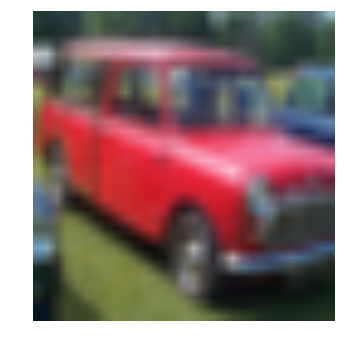

In [55]:
print Xtr[105]
show_image(Xtr[105])

Ahora aplicaremos un escalamiento de acuerdo a la intensidad del pixel. 

[ 0.1372549   0.14117647  0.16470588 ...,  0.1254902   0.12941176
  0.1254902 ]


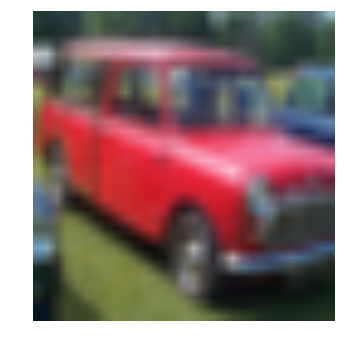

In [54]:
escalado_intensidad = escalar(Xtr, completo = False)
print escalado_intensidad[105]
show_image(escalado_intensidad[105])

Observamos que no existe cambio aparente en la fotografía, esto se debe a como la función *imgshow* de *matplotlib* adecua los números reales a los enteros RGB. 

Ahora utilizaremos el escalamiento normal.

[-1.29871351 -1.2947442  -1.22804317 ..., -1.26007488 -1.23990089
 -1.24500588]


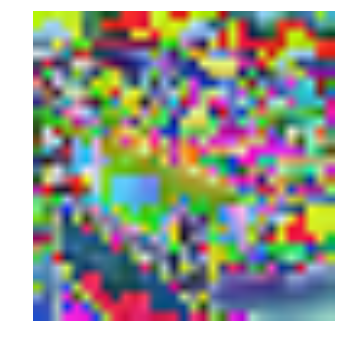

In [57]:
escalado_normal = escalar(Xtr, completo = True)
print escalado_normal[105]
show_image(escalado_normal[105])

Vemos como a efectos prácticos (para un humano) la foto ha perdida todo sentido sin embargo esto no cierto para los algoritmos de aprendizaje.

# Redes neuronales artificiales

>c) Diseñe, entrene y evalúe una red neuronal para el problema CIFAR a partir de la representación original
de las imágenes (píxeles RGB). Experimente con distintas arquitecturas y métodos de entrenamiento, midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de desempeñoo, decida qué modelo, de entre todos los evaluados, evaluará finalmente en el conjunto de test.
Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o igual a $0.5$.

A continuación, se presenta el desarrollo y construcción de la red neuronal modificando su topología y varios de sus paramentos. Cabe destacar que solamente se utilizó el escalamiento tradicional por temas de tiempo.

Se entrenó una red neuronal con tres parámetros distintos de *epoch* con $e=\{2, 4, 8\}$ . Se observo que para el valor $e=8$  fue el mejor valor, mejorando a medida que se aumenta el valor de epoch, tal y como se esperaba.

In [5]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler

def scaler_function(Xtr, Xt, Xva, scale = True):
    Xtr, Xt, Xva = Xtr.astype(np.float64), Xt.astype(np.float64), Xva.astype(np.float64)
    scaler = StandardScaler(with_std = scale).fit(Xtr)
    Xtr_scaled = scaler.transform(Xtr)
    Xt_scaled = scaler.transform(Xt)
    Xva_scaled = scaler.transform(Xva)
    return Xtr_scaled, Xt_scaled, Xva_scaled

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [15]:
Xtr_scaled, Xte_scaled, Xva_scaled = scaler_function(Xtr, Xte, Xva)
Ytr_categorical = to_categorical(Ytr)
Yte_categorical = to_categorical(Yte)
Yva_categorical = to_categorical(Yva)

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

In [33]:
error_validate_epoch = []
error_train_epoch = []

for k in range(1,4):
    
    model = Sequential()
    model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, init='uniform', activation='softmax'))
    model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(Xtr_scaled, Ytr_categorical, nb_epoch=2**k, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

    scores = model.evaluate(Xtr_scaled, Ytr_categorical)
    tr_acc = scores[1]
    
    scores = model.evaluate(Xva_scaled, Yva_categorical)
    va_acc = scores[1]
    
    print "\nEpoch %d ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(2**k, va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
    print"-----------------------------------------------------------------------------------------\n"
    error_validate_epoch.append(1 - va_acc)
    error_train_epoch.append(1 - tr_acc)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 529s - loss: 0.2919 - acc: 0.9008 - val_loss: 0.2727 - val_acc: 0.9022
Epoch 2/2
10000/10000 [==============================] - 61s    

Epoch 2 ---> Va. Acc 0.904100   Va. Error 0.095900 | Tr. Acc 0.904265   Tr. Error 0.095735
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/4
40000/40000 [==============================] - 528s - loss: 0.2918 - acc: 0.9008 - val_loss: 0.2738 - val_acc: 0.9021
Epoch 2/4
40000/40000 [==============================] - 534s - loss: 0.2678 - acc: 0.9031 - val_loss: 0.2609 - val_acc: 0.9044
Epoch 3/4
40000/40000 [==============================] - 544s - loss: 0.2576 - acc: 0.9052 - val_loss: 0.2529 - val_acc: 0.9061
Epoch 4/4
10000/10000 [==============================] - 61s    

Epoch 4 ---> Va. Acc 0.907300   Va. Error 0.092700 | Tr. Acc 0.908320   Tr

Al observar el gráfico se puede ver que el error pareciera disminuir linealmente. Se deberían hacer más pruebas con más posibles valores para el parámetro para verificar esta afirmación pues los errores no varían tanto.

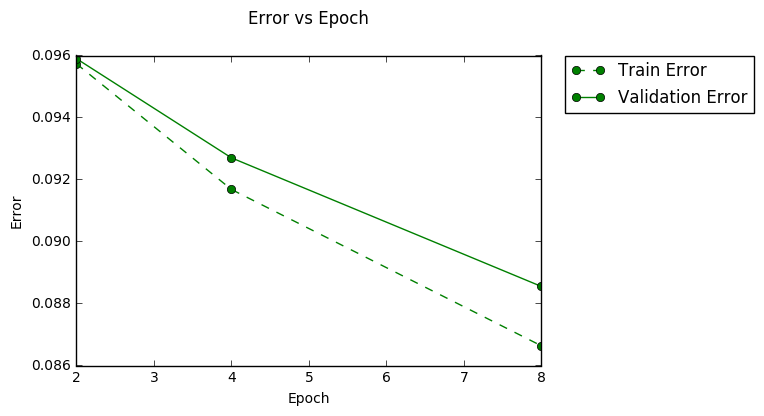

In [34]:
potencias = [2**x for x in range(1, 4)]

plt.plot(potencias, error_train_epoch, 'go--', label='Train Error')
plt.plot(potencias, error_validate_epoch, 'go-', label= 'Validation Error')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Error vs Epoch', y=1.08)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

Luego, se probó variando el número $n$ de neuronas con $n=\{100, 150, 200\}$. Nuevamente los errores no varían tanto, pero el que dió mejor fue usando 200 neuronas lo cual es esperable puesto que con más neuronas el modelo puede aprender más de los datos. Sin embargo, la mejora no es muy significativa.

In [7]:
error_validate_epoch = []
error_train_epoch = []

for k in [100, 150, 200]:
    
    model = Sequential()
    model.add(Dense(k, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, init='uniform', activation='softmax'))
    model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(Xtr_scaled, Ytr_categorical, nb_epoch=2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

    scores = model.evaluate(Xtr_scaled, Ytr_categorical)
    tr_acc = scores[1]
    
    scores = model.evaluate(Xva_scaled, Yva_categorical)
    va_acc = scores[1]
    
    print "\nNeuronas %d ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(k, va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
    print"-----------------------------------------------------------------------------------------\n"
    
    error_validate_epoch.append(1 - va_acc)
    error_train_epoch.append(1 - tr_acc)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 513s - loss: 0.2930 - acc: 0.9007 - val_loss: 0.2737 - val_acc: 0.9017
Epoch 2/2
10000/10000 [==============================] - 57s    

Neuronas 100 ---> Va. Acc 0.904330   Va. Error 0.095670 | Tr. Acc 0.904607   Tr. Error 0.095393
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 739s - loss: 0.2889 - acc: 0.9010 - val_loss: 0.2700 - val_acc: 0.9023
Epoch 2/2
10000/10000 [==============================] - 87s    

Neuronas 150 ---> Va. Acc 0.904810   Va. Error 0.095190 | Tr. Acc 0.905203   Tr. Error 0.094797
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 1036s - loss: 0.2851 - acc: 0.9

Como se observa en el gráfico, ambos errores decaen a medida que se aumenta el número de neuronas.

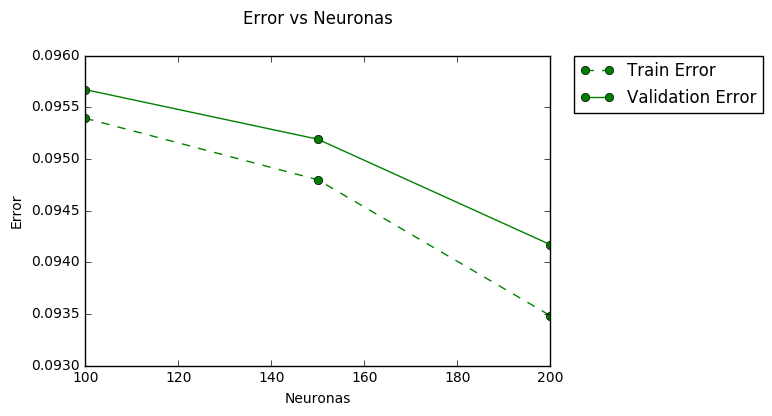

In [9]:
plt.plot([100, 150, 200], error_train_epoch, 'go--', label='Train Error')
plt.plot([100, 150, 200], error_validate_epoch, 'go-', label= 'Validation Error')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Error vs Neuronas', y=1.08)
plt.xlabel('Neuronas')
plt.ylabel('Error')
plt.show()

Finalmente, se probó cambiando la función de activación probando con softmax, sigmoid y relu. El mejor fue softmax, seguido de cerca por sigmoid ambos con un accuracy cercano a 0.90 en el conjunto de validación. La función de activación relu, sin embargo, tuvo un desempeño más decadente logrando solamente un accuracy de 0.81.

In [11]:
model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch= 2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
tr_acc = scores[1]

scores = model.evaluate(Xva_scaled, Yva_categorical)
va_acc = scores[1]


softmax = (va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print "\nSoftmax ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print"-----------------------------------------------------------------------------------------\n"


model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch= 2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
tr_acc = scores[1]

scores = model.evaluate(Xva_scaled, Yva_categorical)
va_acc = scores[1]

sigmoid = (va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print "\nSigmoid ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print"-----------------------------------------------------------------------------------------\n"


model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='relu'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch= 2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
tr_acc = scores[1]

scores = model.evaluate(Xva_scaled, Yva_categorical)
va_acc = scores[1]

relu = (va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print "\nRelu ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print"-----------------------------------------------------------------------------------------\n"

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 520s - loss: 0.2922 - acc: 0.9006 - val_loss: 0.2734 - val_acc: 0.9021
Epoch 2/2
10000/10000 [==============================] - 60s    

Softmax ---> Va. Acc 0.904560   Va. Error 0.095440 | Tr. Acc 0.904722   Tr. Error 0.095278
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 523s - loss: 0.3180 - acc: 0.8962 - val_loss: 0.2863 - val_acc: 0.9021
Epoch 2/2
10000/10000 [==============================] - 61s    

Sigmoid ---> Va. Acc 0.903180   Va. Error 0.096820 | Tr. Acc 0.902910   Tr. Error 0.097090
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 559s - loss: 2.7817 - acc: 0.8114 - val_l

Como podemos apreciar en el gráfico, el error arrojado por las redes bajo la activación de *Sigmoid *y *Softmax* son extremadamente similares, siendo algo mejor *softmax*. Por otro lado, el error bajo *relu* es muy superior a los otros 2 antes mencionados. 

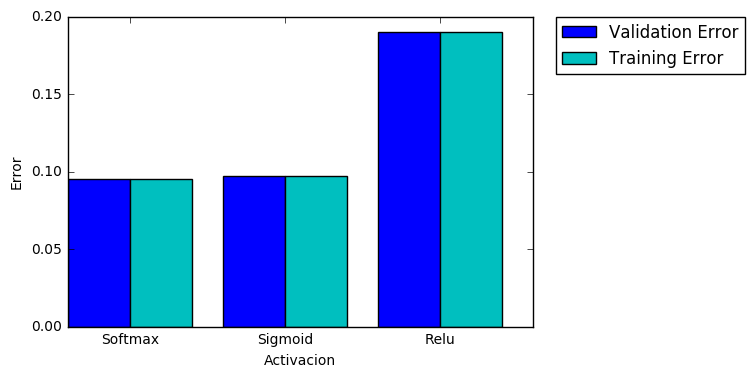

In [11]:
fig, ax = plt.subplots()

ax.set_ylabel('Error')
ax.set_xlabel('Activacion')

val_error = (softmax[1], sigmoid[1], relu[1])
train_error = (softmax[3], sigmoid[3], relu[3])

ind = np.arange(3)
width = 0.4

val_error_bar = ax.bar(ind, val_error, width, color='b')
train_error_bar = ax.bar(ind + width, train_error, width, color='c')

ax.set_xticks(ind + width*1.01)
ax.set_xticklabels(('Softmax', 'Sigmoid', 'Relu'))

plt.legend((val_error_bar[0], train_error_bar[0]), ('Validation Error', 'Training Error'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

De acuerdo con los datos obtenidos en los puntos anteriores evaluaremos el *testing set* en una red neuronal con $100$ neuronas, usando la función de activación *softmax* y usando $epoch=8$. Si bien los datos revelan que con un numero de neuronas mayor, mejoraría el *accuracy*, también revelan que para este caso el parámetro más importante es el número de *epoch*, por lo que por temas de tiempo de ejecución usaremos esta configuración. 

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch=8, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
print "\nTraining Accuracy %f | Training Error %f\n"%(scores[1], 1-scores[1])

scores = model.evaluate(Xva_scaled, Yva_categorical)
print "Validation Accuracy %f | Validation Error %f\n"%(scores[1], 1-scores[1])

scores = model.evaluate(Xte_scaled, Yte_categorical)
print "Testing Accuracy %f | Testing Error %f\n"%(scores[1], 1-scores[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/8
40000/40000 [==============================] - 571s - loss: 0.2679 - acc: 0.9031 - val_loss: 0.2606 - val_acc: 0.9043
Epoch 3/8
40000/40000 [==============================] - 633s - loss: 0.2581 - acc: 0.9049 - val_loss: 0.2532 - val_acc: 0.9058
Epoch 4/8
40000/40000 [==============================] - 232s   
Training Accuracy 0.913265 | Training Error 0.086735

10000/10000 [==============================] - 57s    
Validation Accuracy 0.910990 | Validation Error 0.089010

10000/10000 [==============================] - 59s    
Testing Accuracy 0.911800 | Testing Error 0.088200



Finalmente observamos que nuestra clasificación tiene un error testing de $0.089$ lo que cumple con el objetivo deseado de lograr un error inferior a $0.5$.

>d) Repita la actividad anterior, pero mejorando los atributos utilizados para representar las imágenes. Para esta parte, se distribuirá junto a esta tarea una función denominada *extract_features.py* que extraerá 2 tipos de representaciones sobre una imagen y conjunto de imágenes: *(i)* histogramas de tono, *(ii)* descriptores HOG. Reporte y discuta los resultados obtenidos utilizando las distintas representaciones
por separado o todas simultáneamente. La función *extract_features.py* estará definida en un script denominado *top_level_features.py* y puede ser importada y utilizada como se muestra a continuación.

Para el entrenamiento de la red neuronal se consideraron las características de alto nivel (histogramas de tono y descriptores HOG) de forma simultanea con escalamiento normal.

In [8]:
from sklearn.preprocessing import StandardScaler
from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features

Xtrf = extract_features(Xtr,[hog_features, color_histogram_hsv])
Xtef = extract_features(Xte,[hog_features, color_histogram_hsv])
Xvaf = extract_features(Xva,[hog_features, color_histogram_hsv])

Xtr_scaled, Xte_scaled, Xva_scaled = scaler_function(Xtrf, Xtef, Xvaf)
Ytr_categorical = to_categorical(Ytr)
Yte_categorical = to_categorical(Yte)
Yva_categorical = to_categorical(Yva)

(40000L, 32L, 32L, 3L)
(10000L, 32L, 32L, 3L)
(10000L, 32L, 32L, 3L)
(40000L, 3072L)
(40000L, 154L)


In [9]:
error_validate_epoch = []
error_train_epoch = []

for k in range(1,4):
    
    model = Sequential()
    model.add(Dense(100, input_dim=Xtr_scaled.shape[1], init='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, init='uniform', activation='softmax'))
    model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(Xtr_scaled, Ytr_categorical, nb_epoch=2**k, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

    scores = model.evaluate(Xtr_scaled, Ytr_categorical)
    tr_acc = scores[1]
    
    scores = model.evaluate(Xva_scaled, Yva_categorical)
    va_acc = scores[1]
    
    print "\nEpoch %d ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(2**k, va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
    print"-----------------------------------------------------------------------------------------\n"
    error_validate_epoch.append(1 - va_acc)
    error_train_epoch.append(1 - tr_acc)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 500s - loss: 0.3210 - acc: 0.9000 - val_loss: 0.3161 - val_acc: 0.9000
Epoch 2/2
10000/10000 [==============================] - 57s    

Epoch 2 ---> Va. Acc 0.900000   Va. Error 0.100000 | Tr. Acc 0.900000   Tr. Error 0.100000
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/4
40000/40000 [==============================] - 498s - loss: 0.3220 - acc: 0.9000 - val_loss: 0.3175 - val_acc: 0.9000
Epoch 2/4
40000/40000 [==============================] - 490s - loss: 0.3111 - acc: 0.9000 - val_loss: 0.3027 - val_acc: 0.9000
Epoch 3/4
40000/40000 [==============================] - 486s - loss: 0.2919 - acc: 0.9001 - val_loss: 0.2809 - val_acc: 0.9002
Epoch 4/4
10000/10000 [==============================] - 55s    

Epoch 4 ---> Va. Acc 0.901710   Va. Error 0.098290 | Tr. Acc 0.901707   Tr

Observamos que a diferencia de la vez que se utilizaron todas las características, el tiempo de entrenamiento de la red fue perceptiblemente menor, con una perdida mínima de *acurracy* sobre los conjunto de entrenamiento y de validación. 

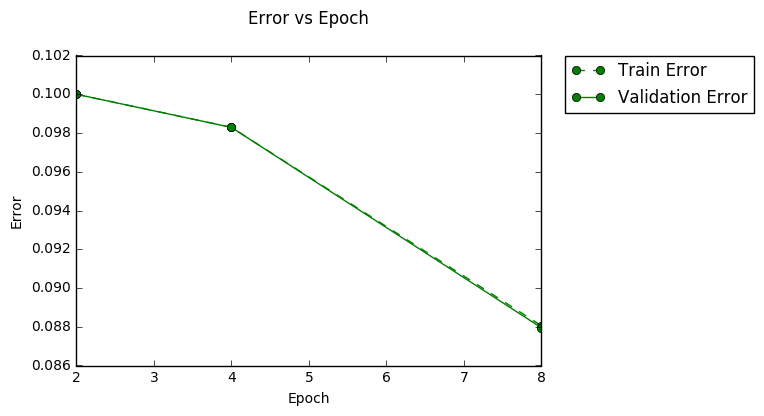

In [10]:
potencias = [2**x for x in range(1, 4)]

plt.plot(potencias, error_train_epoch, 'go--', label='Train Error')
plt.plot(potencias, error_validate_epoch, 'go-', label= 'Validation Error')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Error vs Epoch', y=1.08)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

Ahora volveremos a analizar el rendimiento en función del número de neuronas.

In [11]:
error_validate_epoch = []
error_train_epoch = []

for k in [100, 150, 200]:
    
    model = Sequential()
    model.add(Dense(k, input_dim=Xtr_scaled.shape[1], init='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(10, init='uniform', activation='softmax'))
    model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(Xtr_scaled, Ytr_categorical, nb_epoch=2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

    scores = model.evaluate(Xtr_scaled, Ytr_categorical)
    tr_acc = scores[1]
    
    scores = model.evaluate(Xva_scaled, Yva_categorical)
    va_acc = scores[1]
    
    print "\nNeuronas %d ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(k, va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
    print"-----------------------------------------------------------------------------------------\n"
    
    error_validate_epoch.append(1 - va_acc)
    error_train_epoch.append(1 - tr_acc)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 476s - loss: 0.3212 - acc: 0.9000 - val_loss: 0.3161 - val_acc: 0.9000
Epoch 2/2
10000/10000 [==============================] - 55s    

Neuronas 100 ---> Va. Acc 0.900000   Va. Error 0.100000 | Tr. Acc 0.900000   Tr. Error 0.100000
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 716s - loss: 0.3188 - acc: 0.9000 - val_loss: 0.3116 - val_acc: 0.9000
Epoch 2/2
10000/10000 [==============================] - 85s    

Neuronas 150 ---> Va. Acc 0.900010   Va. Error 0.099990 | Tr. Acc 0.900015   Tr. Error 0.099985
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 895s - loss: 0.3181 - acc: 0.90

En el siguiente grafico observamos que a diferencia del caso para todas las características en numero de neuronas no tiene un efecto significativo en la precisión alcanzado por el modelo. 

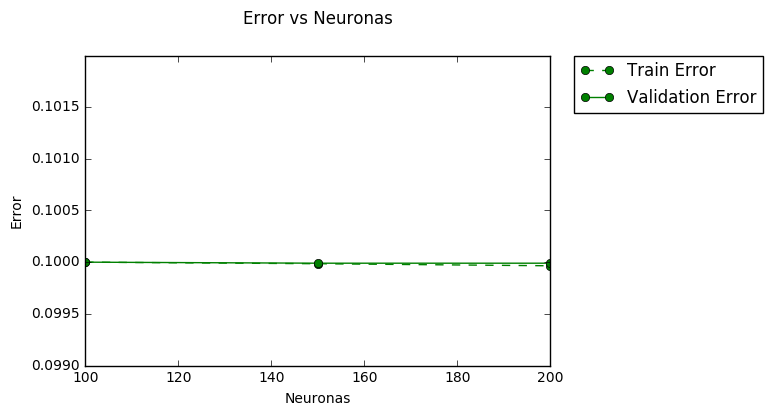

In [39]:
plt.plot([100, 150, 200], error_train_epoch, 'go--', label='Train Error')
plt.plot([100, 150, 200], error_validate_epoch, 'go-', label= 'Validation Error')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Error vs Neuronas', y=1.08)
plt.xlabel('Neuronas')
plt.ylim([0.099, 0.102])
plt.ylabel('Error')
plt.show()

Ahora volveremos a evaluar usando las diferentes funciones de activación. 

In [13]:
model = Sequential()
model.add(Dense(100, input_dim=Xtr_scaled.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch= 2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
tr_acc = scores[1]

scores = model.evaluate(Xva_scaled, Yva_categorical)
va_acc = scores[1]


softmax = (va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print "\nSoftmax ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print"-----------------------------------------------------------------------------------------\n"


model = Sequential()
model.add(Dense(100, input_dim=Xtr_scaled.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch= 2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
tr_acc = scores[1]

scores = model.evaluate(Xva_scaled, Yva_categorical)
va_acc = scores[1]

sigmoid = (va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print "\nSigmoid ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print"-----------------------------------------------------------------------------------------\n"


model = Sequential()
model.add(Dense(100, input_dim=Xtr_scaled.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='relu'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch= 2, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
tr_acc = scores[1]

scores = model.evaluate(Xva_scaled, Yva_categorical)
va_acc = scores[1]

relu = (va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print "\nRelu ---> Va. Acc %f   Va. Error %f | Tr. Acc %f   Tr. Error %f" %(va_acc, 1 - va_acc, tr_acc, 1 - tr_acc)
print"-----------------------------------------------------------------------------------------\n"

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 506s - loss: 0.3217 - acc: 0.9000 - val_loss: 0.3171 - val_acc: 0.9000
Epoch 2/2
10000/10000 [==============================] - 57s    

Softmax ---> Va. Acc 0.900000   Va. Error 0.100000 | Tr. Acc 0.900000   Tr. Error 0.100000
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 510s - loss: 0.4412 - acc: 0.8907 - val_loss: 0.3274 - val_acc: 0.9000
Epoch 2/2
10000/10000 [==============================] - 62s    

Sigmoid ---> Va. Acc 0.900000   Va. Error 0.100000 | Tr. Acc 0.900000   Tr. Error 0.100000
-----------------------------------------------------------------------------------------

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 533s - loss: 2.1462 - acc: 0.7808 - val_l

Nuevamente no observamos una diferencia significativa respecto al caso usando todas las características siendo la función de activación *softmax* la mejor de todas.  

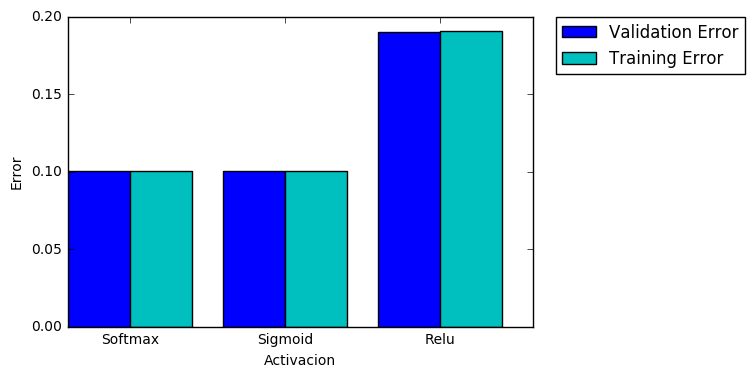

In [14]:
fig, ax = plt.subplots()

ax.set_ylabel('Error')
ax.set_xlabel('Activacion')

val_error = (softmax[1], sigmoid[1], relu[1])
train_error = (softmax[3], sigmoid[3], relu[3])

ind = np.arange(3)
width = 0.4

val_error_bar = ax.bar(ind, val_error, width, color='b')
train_error_bar = ax.bar(ind + width, train_error, width, color='c')

ax.set_xticks(ind + width*1.01)
ax.set_xticklabels(('Softmax', 'Sigmoid', 'Relu'))

plt.legend((val_error_bar[0], train_error_bar[0]), ('Validation Error', 'Training Error'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Finalmente evaluamos nuevamente el conjunto de entrenamiento bajo una red neuronal configurada con los mismos paramentos usados con todas las características. 

In [15]:
model = Sequential()
model.add(Dense(100, input_dim=Xtr_scaled.shape[1], init='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr_scaled, Ytr_categorical, nb_epoch=8, batch_size=100, verbose=1, validation_data=(Xva_scaled, Yva_categorical))

scores = model.evaluate(Xtr_scaled, Ytr_categorical)
print "\nTraining Accuracy %f | Training Error %f\n"%(scores[1], 1-scores[1])

scores = model.evaluate(Xva_scaled, Yva_categorical)
print "Validation Accuracy %f | Validation Error %f\n"%(scores[1], 1-scores[1])

scores = model.evaluate(Xte_scaled, Yte_categorical)
print "Testing Accuracy %f | Testing Error %f\n"%(scores[1], 1-scores[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/8
40000/40000 [==============================] - 493s - loss: 0.3211 - acc: 0.9000 - val_loss: 0.3159 - val_acc: 0.9000
Epoch 2/8
40000/40000 [==============================] - 493s - loss: 0.3081 - acc: 0.9000 - val_loss: 0.2989 - val_acc: 0.9000
Epoch 3/8
40000/40000 [==============================] - 530s - loss: 0.2886 - acc: 0.9001 - val_loss: 0.2789 - val_acc: 0.9003
Epoch 4/8
40000/40000 [==============================] - 554s - loss: 0.2709 - acc: 0.9011 - val_loss: 0.2635 - val_acc: 0.9017
Epoch 5/8
40000/40000 [==============================] - 492s - loss: 0.2575 - acc: 0.9031 - val_loss: 0.2516 - val_acc: 0.9045
Epoch 6/8
40000/40000 [==============================] - 509s - loss: 0.2471 - acc: 0.9056 - val_loss: 0.2421 - val_acc: 0.9075
Epoch 7/8
40000/40000 [==============================] - 490s - loss: 0.2390 - acc: 0.9084 - val_loss: 0.2346 - val_acc: 0.9100
Epoch 8/8
40000/40000 [==============================]

Finalmente observamos que en términos globales obtenemos un rendimiento infamante menor al alcanzado con todas las características, pero alcanzando una mayor eficiencia en el tiempo invertido para alcanzar dichos niveles de *accuracy*.  

Para finalizar trataremos de visualizar lo que ambos métodos de extracción de características extraen. 

In [59]:
Xtrf = extract_features(Xtr,[color_histogram_hsv])

(40000L, 32L, 32L, 3L)


Ahora seleccionaremos una imagen:

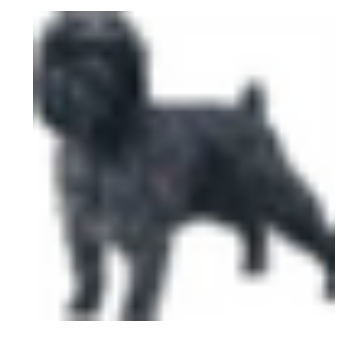

In [77]:
a = show_image(Xtr[404])

Ahora presentamos el histograma de tono para esta imagen:

[ 0.375       0.01171875  0.          0.00292969  0.00292969  0.43945313
  0.15820312  0.00683594  0.00292969  0.        ]


<function matplotlib.pyplot.show>

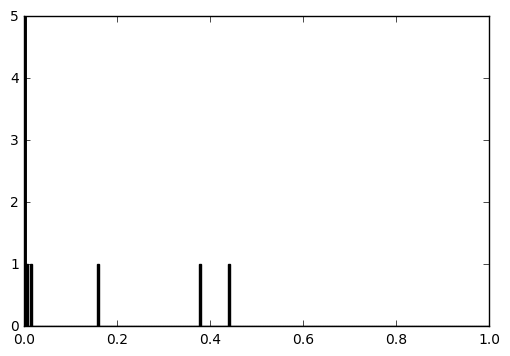

In [83]:
print Xtrf[404]
plt.hist(Xtrf[404], bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show

Y por último trataremos de visualizar *HOG*

In [84]:
Xtrf = extract_features(Xtr,[hog_features])

(40000L, 32L, 32L, 3L)


In [85]:
print Xtrf.shape

(40000L, 144L)


In [94]:
from matplotlib import pyplot as plt

def show_image_hog(image):
    img = []
    linea = []
    contador = 1
    
    for i in range(0, 48):
        if contador < 7:
            linea.append([image[i], image[48+i], image[48+i]])
            contador = contador + 1
        else:
            img.append(linea)
            contador = 1
            linea = []
    
    img = np.array(img)
    plt.axis("off")
    plt.imshow(img)
    plt.show()        

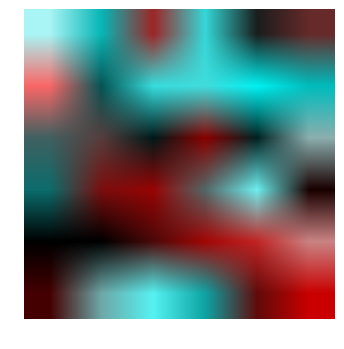

In [95]:
show_image_hog(Xtrf[404])

Como vemos el cuadro anterior no tiene mucho sentido respecto a la imagen original pero contiene los descriptores *HOG*.

# SVM No Lineal

>(e) Entrene una SVM no lineal sobre los pixeles originales y sobre los atributos de alto nivel utilizados para
representar las imágenes en el item anterior. Puede utilizar el conjunto de validación para seleccionar
hiper-parámetros, como el nivel de regularización aplicado y/o la función de kernel a utilizar.

Para el entrenamiento de la SVM no lineal se consideraron los pixeles originales de las imágenes junto a las características de alto nivel (histogramas de tono y descriptores HOG) con escalamiento.

In [2]:
from sklearn.preprocessing import StandardScaler
from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features
import datetime

Xtr, Ytr, Xte, Yte, Xva, Yva = load_CIFAR10('./dataset')

print datetime.datetime.now().time()
feat = extract_features(Xtr,[hog_features, color_histogram_hsv])
Xtrf = np.concatenate((Xtr,feat),axis=1)
print datetime.datetime.now().time()
feat = extract_features(Xva,[hog_features, color_histogram_hsv])
Xvaf = np.concatenate((Xva,feat),axis=1)
print datetime.datetime.now().time()
feat = extract_features(Xte,[hog_features, color_histogram_hsv])
Xtef = np.concatenate((Xte,feat),axis=1)
print datetime.datetime.now().time()

scaler = StandardScaler().fit(Xtrf)
Xtrs = scaler.transform(Xtrf)
Xvas = scaler.transform(Xvaf)
Xtes = scaler.transform(Xtef)

22:14:21.214893
(40000, 32, 32, 3)
22:15:43.075564
(10000, 32, 32, 3)
22:16:03.425401
(10000, 32, 32, 3)
22:16:24.316927


Se selecciono el kernel a utilizar y el parámetro de regularización C con un método iterativo. Primero, se probó cual de los dos kernels a utilizar con $C=1.0$. Luego de seleccionado el kernel, se probó cual valor para $C$ era mejor con $C \in \{ 0.1, 1, 10 \}$. Cabe notar que por limitaciones de tiempo se limitó la ejecución del solver interno de la SVM a 300 iteraciones.

Se obtuvó así una SVM no lineal haciendo uso de un kernel Gaussiano con un C = 1.0. El *accuracy* en el conjunto de entrenamiento fue de 0.4732, en el conjunto de validación de 0.4261 y en el conjunto de pruebas 0.4253. Este resultado podría mejorarse haciendo uso de más iteraciones en el solver o dejar que la optimización se complete.

In [3]:
from sklearn.svm import SVC
import time
import datetime

def get_best_SVC(Xtr,Ytr,Xva,Yva):
    kernels = ['poly','rbf']
    possible_C = [0.1,10.0] #C=1.0 se prueba cuando se prueban los kernels
    best_score = 0
    best_model = SVC()
    best_kernel = 'rbf'
    best_C = 1.0
    print datetime.datetime.now().time()
    #primero seleccionamos el kernel
    for k in kernels:
        model = SVC(kernel = k, random_state = 0, max_iter = 300)
        model.fit(Xtr, Ytr)
        score = model.score(Xva,Yva)
        if( score >= best_score ):
            best_score = score
            best_model = model
            best_kernel = k
            best_C = 1.0
        print "Kernel=%s, C=%f, score=%f"%(k,1.0,score)
        print datetime.datetime.now().time()
    
    #luego seleccionamos C
    for Ct in possible_C:
        model = SVC(kernel = best_kernel, C=Ct, random_state = 0, max_iter = 300)
        model.fit(Xtr, Ytr)
        score = model.score(Xva,Yva)
        if( score >= best_score ):
            best_score = score
            best_model = model
            best_C = Ct
        print "Kernel=%s, C=%f, score=%f"%(best_kernel,Ct,score)
        print datetime.datetime.now().time()
    return best_model, best_kernel, best_C, best_score
    
start = time.time()
best_SVC, best_kernel, best_C, best_SVC_score = get_best_SVC(Xtrs,Ytr,Xvas,Yva)
end = time.time()
print "%f segundos"%(end-start)
print "Mejor kernel:", best_kernel
print "Mejor C:", best_C
print "Score train:",best_SVC.score(Xtrs, Ytr)
print "Score valid:",best_SVC_score
print "Score test:",best_SVC.score(Xtes, Yte)

22:22:03.658636


/home/worm/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:224: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Kernel=poly, C=1.000000, score=0.143400
22:48:32.655011
Kernel=rbf, C=1.000000, score=0.426100
23:18:50.436049
Kernel=rbf, C=0.100000, score=0.328100
23:47:43.741294
Kernel=rbf, C=10.000000, score=0.398400
00:18:50.089056
7006.668371 segundos
Mejor kernel: rbf
Mejor C: 1.0
Score train: 0.4732
Score valid: 0.4261
Score test: 0.4253


Al entrenar la SVM completa con los parámetros obtenidos previamente se puede mejorar bastante el resultado. El *accuracy* obtenido fue de 0.7961 para el conjunto de entrenamiento, 0.6237 para el conjunto de validación y de 0.618 para el conjunto de pruebas.

In [5]:
from sklearn.svm import SVC
import time
import datetime
   
print datetime.datetime.now().time()
start = time.time()
model_SVC = SVC(kernel = best_kernel, C=best_C, random_state = 0)
model_SVC.fit(Xtrs,Ytr)
end = time.time()
print "%f segundos"%(end-start)
print "Mejor kernel:", best_kernel
print "Mejor C:", best_C
print "Score train:",best_SVC.score(Xtrs, Ytr)
print "Score valid:",best_SVC.score(Xvas, Yva)
print "Score test:",best_SVC.score(Xtes, Yte)
print datetime.datetime.now().time()

01:29:02.806582
10706.278124 segundos
Mejor kernel: rbf
Mejor C: 1.0
Score train: 0.79615
Score valid: 0.6237
Score test: 0.618
06:12:11.883237


# Árbol de Decisión

>(f) Entrene un árbol de clasificación sobre los pixeles originales y sobre los atributos de alto nivel utilizados para representar las imágenes en el item anterior. Puede utilizar el conjunto de validación para seleccionar hiper-parámetros, como la profundidad máxima del árbol.

Para el entrenamiento del árbol se consideraron los pixeles originales de las imágenes junto a las características de alto nivel (histogramas de tono y descriptores HOG) sin escalamiento.

In [2]:
from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features
import datetime

Xtr, Ytr, Xte, Yte, Xva, Yva = load_CIFAR10('./dataset')

print datetime.datetime.now().time()
feat = extract_features(Xtr,[hog_features, color_histogram_hsv])
Xtrf = np.concatenate((Xtr,feat),axis=1)
print datetime.datetime.now().time()
feat = extract_features(Xva,[hog_features, color_histogram_hsv])
Xvaf = np.concatenate((Xva,feat),axis=1)
print datetime.datetime.now().time()
feat = extract_features(Xte,[hog_features, color_histogram_hsv])
Xtef = np.concatenate((Xte,feat),axis=1)
print datetime.datetime.now().time()

15:49:31.505173
(40000, 32, 32, 3)
15:50:53.801199
(10000, 32, 32, 3)
15:51:14.402433
(10000, 32, 32, 3)
15:51:35.538437


Se limitó la altura del árbol. Previamente se probó con parámetros por defecto y se obtuvó un árbol de 44 niveles de profundidad el cual generaba un serio sobre-ajuste (*accuracy* de 1.0 en el conjunto de entrenamiento y de 0.2 en el conjunto de pruebas).

Para seleccionar una buena profundidad se seleccionó la profundidad máxima $d \in \{2,4,8,16,32\}$ que tuviera mejor *accuracy* sobre el conjunto de validación. 

El mejor árbol encontrado fue con 8 niveles de profundidad. Si la profundidad del árbol hubiese sido más grande no empeoraba considerablemente la *accuracy* sobre el conjunto de validación. Con 16 y 32 niveles la *accuracy* era apenas un 0.1 y 0.2 menor que con 8 niveles, respectivamente.

El árbol de 8 niveles obtenido logró un *accuracy* cercano a 0.3 en todos los conjuntos, con un *accuracy* de 0.3757 en el conjunto de entrenamiento, de 0.3075 en el conjunto de validación y de 0.3177 en el conjunto de pruebas.

In [6]:
from sklearn.tree import DecisionTreeClassifier as CTree
import time
import datetime

def get_best_tree(Xtr,Ytr,Xva,Yva):
    #se probó previamente que la profundidad por defecto quedaba en 44
    #con un serio over-fitting siendo peor su rendimiento que un arbol testeado con profundidad 10
    depths = [2,4,8,16,32]
    best_score = 0
    best_model = CTree()
    best_depth = 0
    print datetime.datetime.now().time()
    for depth in depths:
        model = CTree(max_depth = depth)
        model.fit(Xtr, Ytr)
        score = model.score(Xva,Yva)
        if( score >= best_score ):
            best_score = score
            best_model = model
            best_depth = depth
        print "Depth=%d, score=%f"%(depth,score)
        print datetime.datetime.now().time()
    return best_model, best_depth, best_score

start = time.time()
best_model, best_depth, best_score = get_best_tree(Xtrf,Ytr,Xvaf,Yva)
end = time.time()
print "%f segundos"%(end-start)
print "Mejor profundidad:", best_depth
print "Score train:",best_model.score(Xtrf, Ytr)
print "Score valid:",best_score
print "Score test:",best_model.score(Xtef, Yte)

14:52:48.145623
Depth=2, score=0.190100
14:53:11.751494
Depth=4, score=0.243700
14:53:57.763704
Depth=8, score=0.307500
14:55:36.248859
Depth=16, score=0.292500
14:59:02.498599
Depth=32, score=0.281000
15:02:55.944288
607.799025 segundos
Mejor profundidad: 8
Score train: 0.3757
Score valid: 0.3075
Score test: 0.3177


# Conclusiones

Se probaron varios clasificadores no lineales para el dataset CIFAR10 que contempla clasificación de imagenes. Los clasificadores probados fueron: ANN (red neuronal artificial), SVM y Árbol de clasificación

El mejor clasificador pareciera ser las ANN con un *accuracy* cercano al 90% sobre el conjunto de validación.

Luego, la SVM no lineal logró un *accuracy* de 0.623 sobre el conjunto de validación y de 0.618 sobre el conjunto de pruebas. Se debe notar que el ajuste de parámetros se realizó limitando el número de iteraciones para la optimización.

Finalmente, el árbol de decisión tuvo el peor desempeño con un *accuracy* de 0.3075 en el conjunto de validación y de 0.3177 sobre el conjunto de pruebas.